#**Reporte de Analisis VIII**

Importando librerias.

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize = (14,6))

Importando drive para tener disponibles los archivos.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
Ubicacion_Archivo = '/content/gdrive/MyDrive/Archivos-csv/Alquiler_Residencias/Alq_Residencias_sin_nulos.csv'

In [ ]:
datos = pd.read_csv(Ubicacion_Archivo, sep = ";")
datos.head(20)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0
4,Departamento,Barranco,3,1,0,70,1200.0,0.0,0.0
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0
8,Departamento,Pachacámac,1,0,0,36,1200.0,0.0,0.0
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0


Agregando la columna de valor por m2.

In [ ]:
datos["Valor m2"] = (datos["Valor"]) / (datos["Area"])
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.500000
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.000000
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.333333
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.666667
4,Departamento,Barranco,3,1,0,70,1200.0,0.0,0.0,17.142857
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.000000
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.333333
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.384615
8,Departamento,Pachacámac,1,0,0,36,1200.0,0.0,0.0,33.333333
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.428571


Redondeando el resultado a 2 decimales.

In [ ]:
datos["Valor m2"] = datos["Valor m2"].round(2)
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67
4,Departamento,Barranco,3,1,0,70,1200.0,0.0,0.0,17.14
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38
8,Departamento,Pachacámac,1,0,0,36,1200.0,0.0,0.0,33.33
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43


Creando una nueva columna que se encargara de agrupar todos los registros por casas o departamentos.

In [ ]:
casa = ["Casa", "Casa en condominio", "Casa de villa"]

In [ ]:
def agrupar_tipo(item):
    if "Casa" in item:
        return "CASA"
    else:
        return "Departamento"

In [ ]:
datos["Tipo de Casa"] = datos["Tipo"].apply(agrupar_tipo)

In [ ]:
datos.head(20)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo de Casa
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,CASA
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Barranco,3,1,0,70,1200.0,0.0,0.0,17.14,Departamento
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,CASA
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,CASA
8,Departamento,Pachacámac,1,0,0,36,1200.0,0.0,0.0,33.33,Departamento
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento


In [ ]:
datos.to_csv("Residencias_Detalle.csv", sep = ";", index = False)

#**Identificando y Excluyendo Outliers I**

In [ ]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo de Casa
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,CASA
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Barranco,3,1,0,70,1200.0,0.0,0.0,17.14,Departamento
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,CASA
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,CASA
8,Departamento,Pachacámac,1,0,0,36,1200.0,0.0,0.0,33.33,Departamento
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento


Comenzando con Box-plpt(diagrama de caja).

Es otrp tipo de grafico que nos permite visualizar los datos del dataset o df en cuestion.

Las columnas a pasar para su analisis deben ser columnas que contengan valores numericos, no se pueden pasar columnas de tipo string ya que no es medible.

<Axes: >

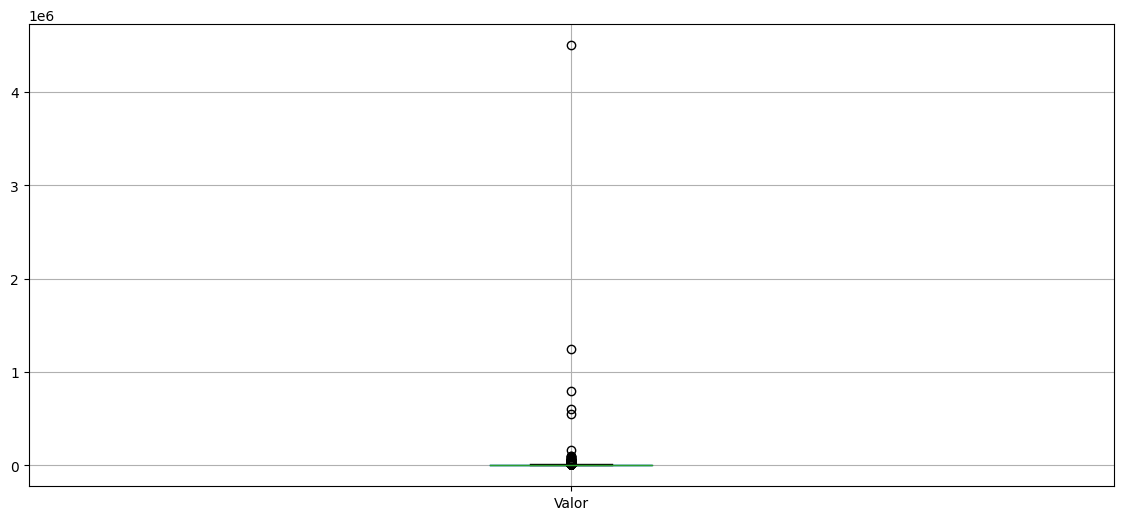

In [ ]:
datos.boxplot(["Valor"])

La media de los inmuebles (y la mayoria de ellos) se encuentran entre 0 y 1 (se supone que es en millones, por lo que la mayoria de inmuebles se encuentran entre 0 y 500Mil pesos).

Los punto que estan por encima de 1 en la grafica los voy a tomar como Outliers.

In [ ]:
datos[datos["Valor"] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo de Casa
7996,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,9230.77,Departamento
11151,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,4907.98,CASA
13260,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,3666.67,Departamento
14502,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Departamento
16251,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Departamento


Importando libreria para tratar imagenes.

In [ ]:
from PIL import Image
import IPython.display as dsp

In [ ]:
# Cargar la imagen
imagen_Ruta = "/content/gdrive/MyDrive/IMG/compressed_box-plot.png"
imagen = Image.open(imagen_Ruta)

In [ ]:
# Obtener las dimensiones originales de la imagen
ancho_original, alto_original = imagen.size

# Ajustar el ancho a un 110% del tamaño original
nuevo_ancho = int(ancho_original * 1.1)
nuevo_alto = int(alto_original * 1.1)

In [ ]:
# Redimensionar la imagen
imagen_redimensionada = imagen.resize((nuevo_ancho, nuevo_alto))

Imagen de como se ve graficamente el diagrama de caja(teorico), hay varios tipos de graficos.

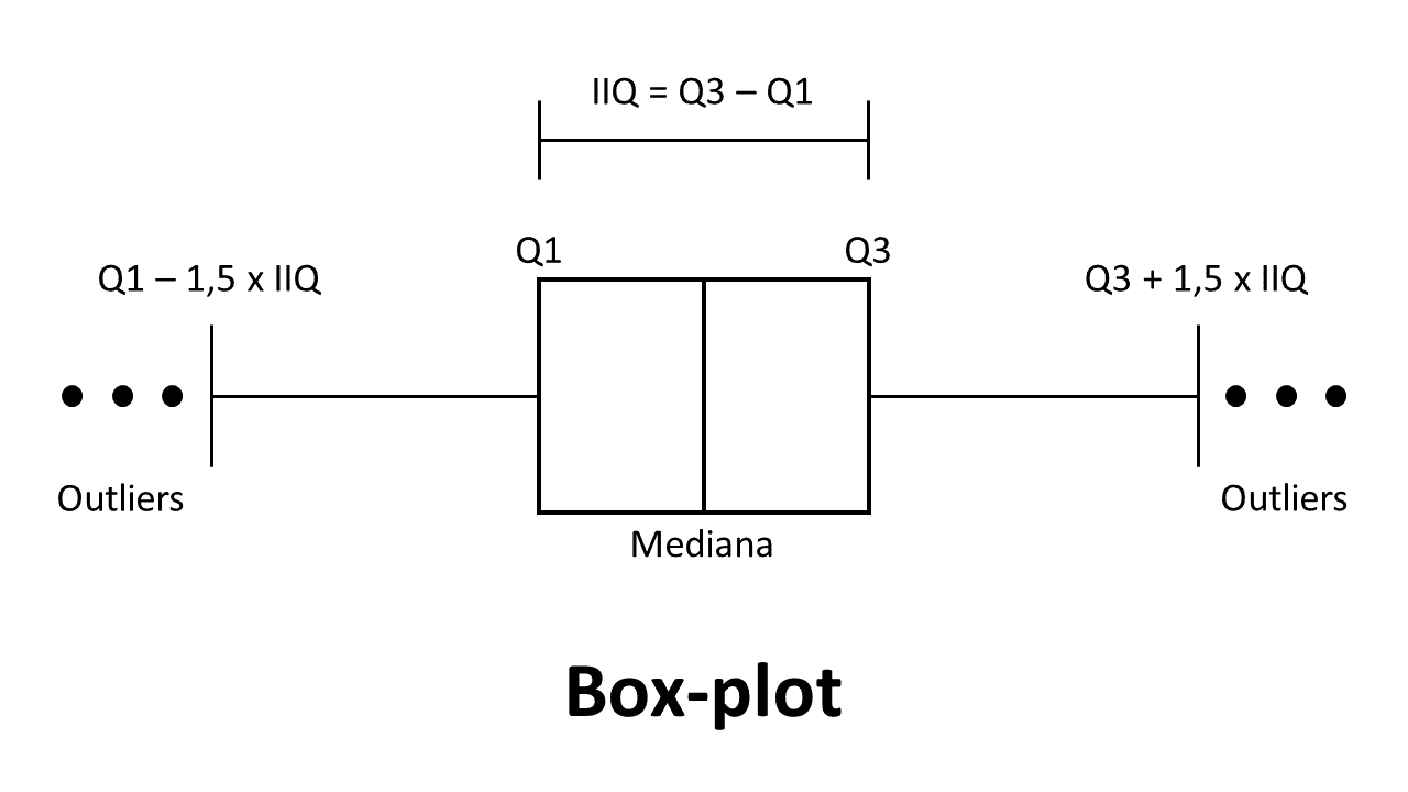

In [ ]:
# Mostrar la imagen redimensionada
dsp.display(imagen_redimensionada)

Creando los cuartiles para luego eliminar esos valores(5, los mas notorios pero no seran los unicos) que no deberian correaponder a la col. Valor ya que son Valores de inmuebles para venta y no para alquilar.

In [ ]:
#La base sobre la que voy a trabajar los cuartiles(necesito un objeto)
var_valor = datos["Valor"]

Creando las medidads para el boxplot.

In [ ]:
Q1 = var_valor.quantile(0.25)  #25%
Q3 = var_valor.quantile(0.75)  #75%
IIQ = Q3 - Q1         #Intervalo Inter Quartil
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

Creo mi criterio de seleccion.

Quiero que mis datos se mantengan dentro del grafico, los que quedan por fuera de los limites son outliers.

In [ ]:
seleccion = (var_valor >= limite_inferior) & (var_valor <= limite_superior)

In [ ]:
datos_new = datos[seleccion]

In [ ]:
datos.shape[0]

22845

In [ ]:
datos_new.shape[0]

20640

<Axes: >

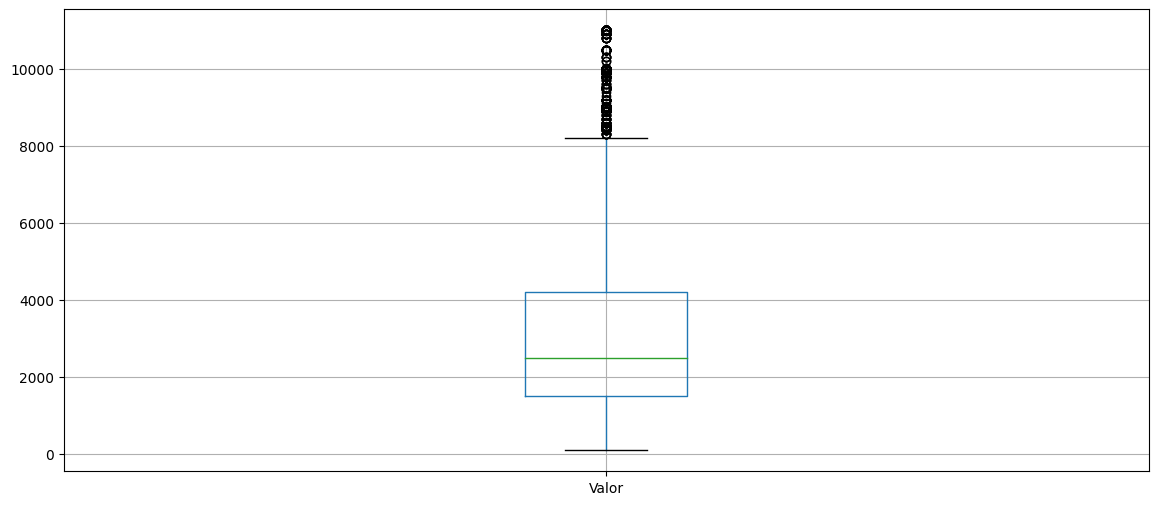

In [ ]:
datos_new.boxplot(["Valor"])

Los que pasan de 1 podrian ser alquileres para locales comerciales o residencias en zonas mas exclusivas.

**Histogramas**

Un histograma divide el rango de valores de un conjunto de datos en intervalos y muestra la frecuencia de observaciones/repeticiones que hay en cada intervalo. Cada barra en el histograma representa un intervalo y la altura de la barra indica la frecuencia de repeticiones en ese intervalo.

Al no estar tratado no es posible sacar conclusiones y el grafico no sera util de esta forma.

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

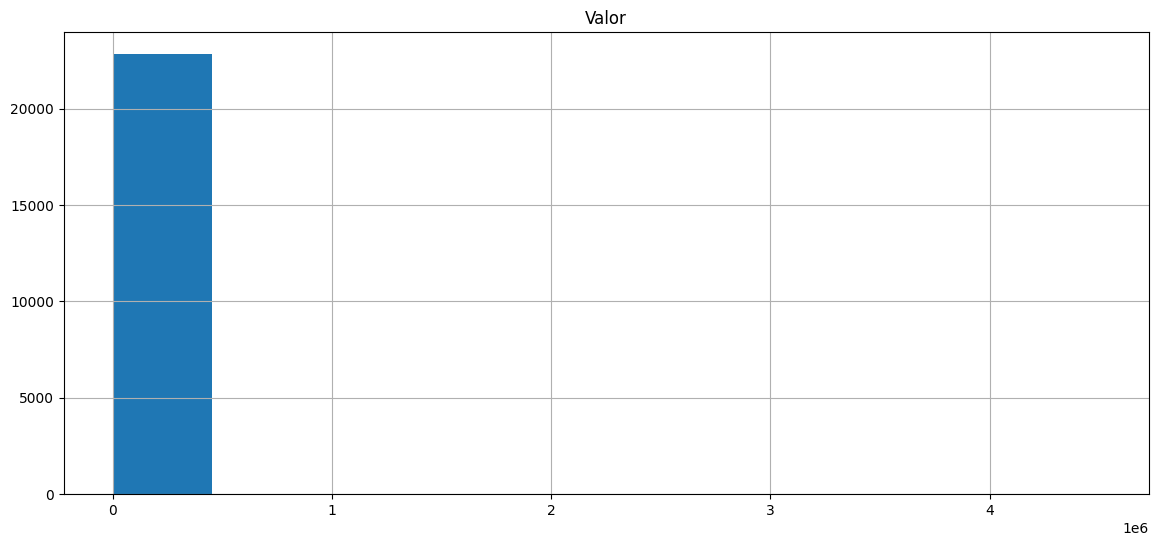

In [ ]:
datos.hist(["Valor"])

La mayoria de alquileres estan en el rango de $2.000, la minoria entre 3.000 y 6.000 y hay una cantidad todavia mas exclusiva que supera los 6.000.



array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

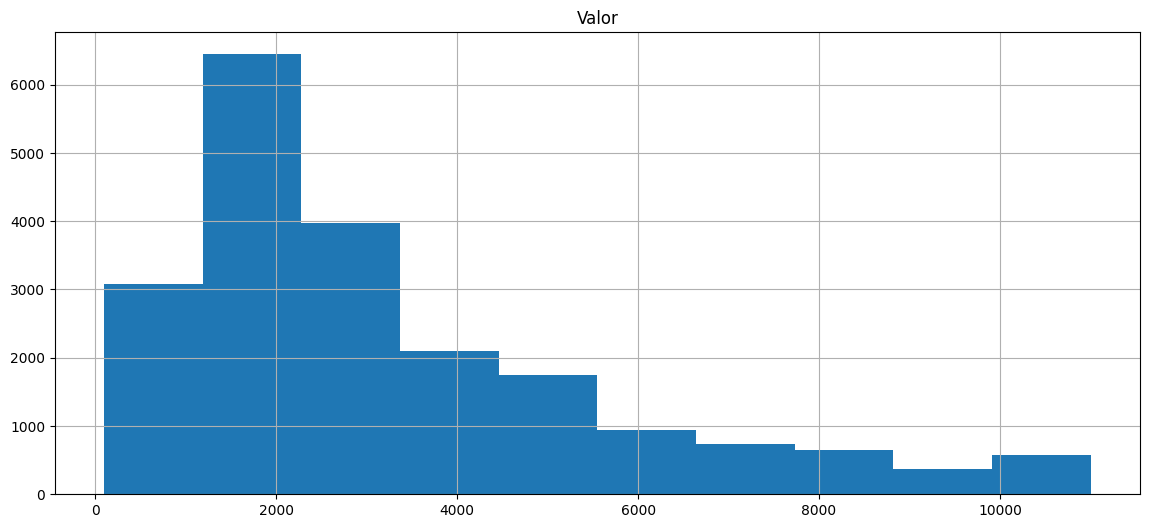

In [ ]:
datos_new.hist(["Valor"])

#**Identificando y Excluyendo Outliers II**

Generando un boxplot por categorias(genero el grafico con la condicion de que los agrupe segun tipo de inmueble).

Asi el analisis es mucho mas limpio y los outliers son menos y mas visibles.

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

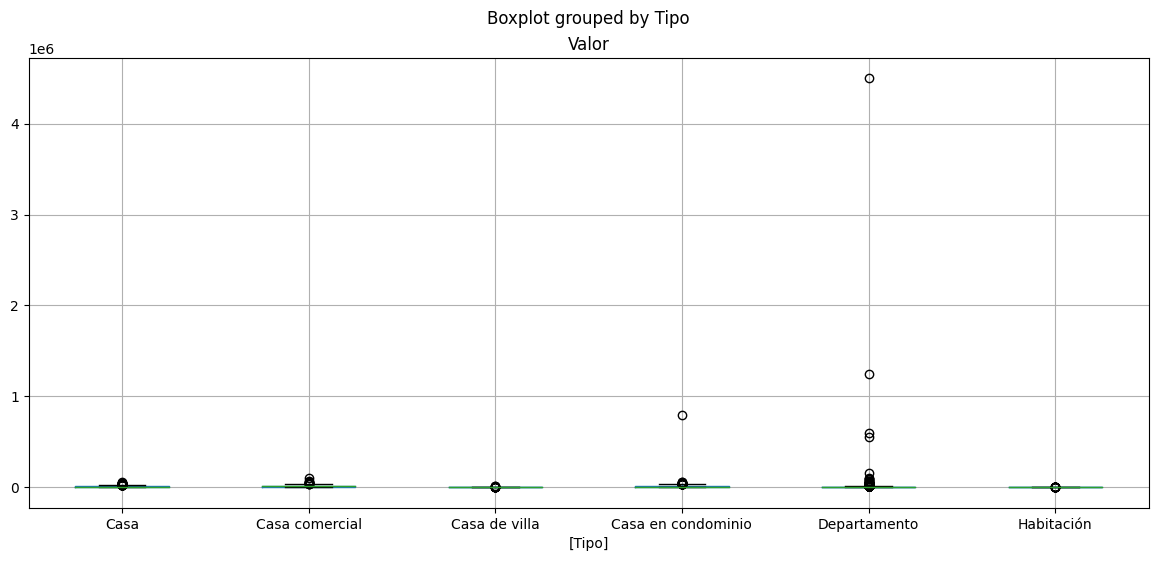

In [ ]:
datos.boxplot(["Valor"], by = ["Tipo"])

In [ ]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo de Casa
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,CASA
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Barranco,3,1,0,70,1200.0,0.0,0.0,17.14,Departamento
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,CASA
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,CASA
8,Departamento,Pachacámac,1,0,0,36,1200.0,0.0,0.0,33.33,Departamento
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento


Creo una variable que agrupe los valores de los inmuebles por el tipo de inmueble.

In [ ]:
grupo_tipo = datos.groupby(["Tipo"])["Valor"]

Es una series, es decir que solo esta guardando una columna.

In [ ]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [ ]:
grupo_tipo.groups

Generando el boxplot para cada tipo de inmueble.

Se van a generar limites inf. y sup. para cada tipo por separado.

In [ ]:
Q1 = grupo_tipo.quantile(.25)  #25%
Q3 = grupo_tipo.quantile(0.75)  #75%
IIQ = Q3 - Q1         #Intervalo Inter Quartil
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
Q1

Tipo
Casa                  1100.0
Casa comercial        6000.0
Casa de villa          750.0
Casa en condominio    4000.0
Departamento          1600.0
Habitación             900.0
Name: Valor, dtype: float64

In [ ]:
limite_inferior

Tipo
Casa                 -11950.0
Casa comercial       -12000.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Departamento          -3500.0
Habitación                0.0
Name: Valor, dtype: float64

In [ ]:
limite_superior

Tipo
Casa                  22850.0
Casa comercial        36000.0
Casa de villa          3375.0
Casa en condominio    32125.0
Departamento          10100.0
Habitación             2400.0
Name: Valor, dtype: float64

**1-- datos_new_por_grupos = pd.DataFrame()** Se crea un nuevo DataFrame vacío llamado datos_new_por_grupos que se utilizará para almacenar los datos seleccionados después de aplicar los criterios definidos en el bucle.

**2-- for tipo_de_inmueble in grupo_tipo.groups.keys():** Se inicia un bucle que recorre cada grupo definido por la columna "Tipo" utilizando grupo_tipo.groups.keys(), donde tipo_de_inmueble toma el valor de cada tipo de inmueble presente en la columna "Tipo".

**3-- tipo = datos["Tipo"] == tipo_de_inmueble**.  Se crea una serie booleana llamada tipo que devolvera **True** para las filas donde el valor en la columna **"Tipo"** sea igual a tipo_de_inmueble y **False** en caso contrario.

**4--   dentro_del_lim = (datos["Valor"] >= limite_inferior[tipo_de_inmueble]) & \
                   (datos["Valor"] <= limite_superior[tipo_de_inmueble])**. Se crea otra serie booleana llamada dentro_del_lim que sera True para las filas donde el valor en la columna "Valor" está dentro del rango definido por los límites inferior y superior para el tipo de inmueble actual.

**5--  sel_tipo = tipo & dentro_del_lim**. Se crea una serie booleana final llamada **sel_tipo** que es la combinación lógica(&) de las dos condiciones anteriores, es decir, sera True para las filas que cumplan ambas condiciones.

**6--  datos_sel_tipo = datos[sel_tipo]**. Se seleccionan las filas del DataFrame original (datos) que cumplen con las condiciones especificadas y se almacenan en un nuevo DataFrame llamado **datos_sel_tipo**.

**7-- datos_new_por_grupos = pd.concat([datos_new_por_grupos, datos_sel_tipo])**. Se concatenan (agregan) las filas seleccionadas para el tipo de inmueble actual al DataFrame datos_new_por_grupos. Esto se hace en cada iteración del bucle, acumulando así las filas seleccionadas para todos los tipos de inmuebles.

**En resumen:** este código crea un nuevo DataFrame (datos_new_por_grupos) que contiene solo las filas del DataFrame original (datos) que cumplen con ciertos criterios definidos por los límites inferior y superior para cada tipo de inmueble.

In [ ]:
datos_new_por_grupos = pd.DataFrame()
for tipo_de_inmueble in grupo_tipo.groups.keys():
  tipo = datos["Tipo"] == tipo_de_inmueble
  dentro_del_lim = (datos["Valor"] >= limite_inferior[tipo_de_inmueble]) & \
  (datos["Valor"] <= limite_superior[tipo_de_inmueble])
  sel_tipo = tipo & dentro_del_lim
  datos_sel_tipo = datos[sel_tipo]
  datos_new_por_grupos = pd.concat([datos_new_por_grupos, datos_sel_tipo])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

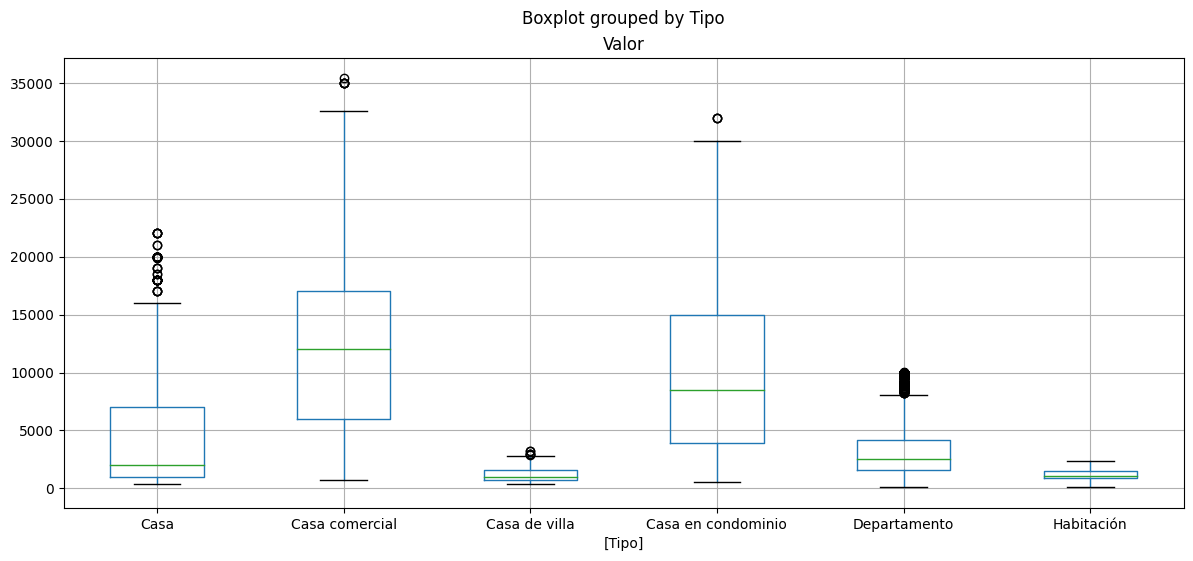

In [ ]:
datos_new_por_grupos.boxplot(["Valor"], by= ["Tipo"])

In [ ]:
datos_new_por_grupos.to_csv("Alq_Residencial_Sin_Outliers.csv", sep=";", index = False)